In [1]:
import matplotlib.pyplot as plt

In [14]:
def parse_energy_log_minute_averages(filename):
    minute = 0
    energy_joules_per_minute = []
    
    with open(filename, "r") as f:
        energy_accumulated = 0
        count = 0
        
        for line in f:
            # Check for lines containing the energy measurement in Joules
            if "Joules power/energy-pkg/" in line:
                parts = line.split()
                energy = float(parts[0])  # Extract energy value in joules
                
                # Accumulate energy and increment count
                energy_accumulated += energy
                count += 1
                
                # Every 60 seconds, compute the average and reset counters
                if count == 60:
                    average_energy = energy_accumulated / 60
                    energy_joules_per_minute.append(average_energy)
                    minute += 1
                    energy_accumulated = 0
                    count = 0
    
    # Return minutes as the x-axis and energy averages as y-axis data
    return list(range(len(energy_joules_per_minute))), energy_joules_per_minute

In [15]:
# Parse each file with minute averaging
minutes_vit_h, energy_vit_h = parse_energy_log_minute_averages("vit_h_energy_log.txt")

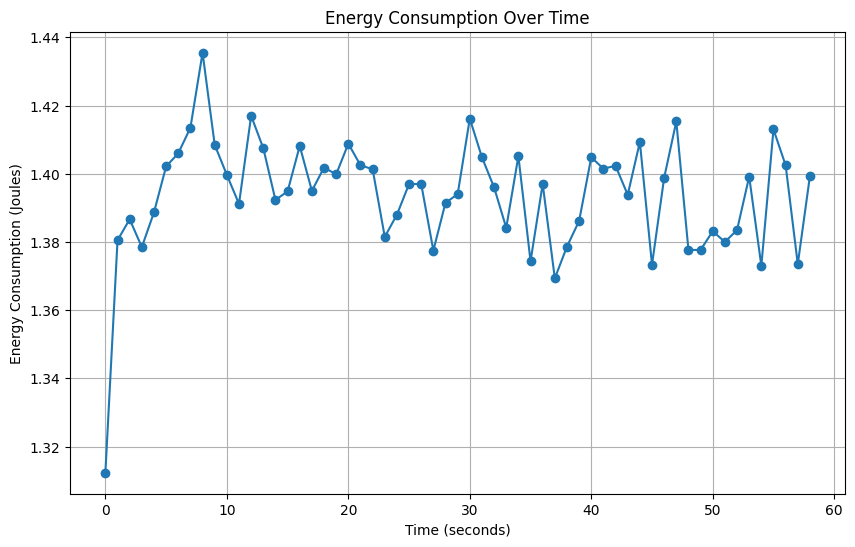

In [16]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(minutes_vit_h, energy_vit_h, marker='o', linestyle='-')
plt.xlabel("Time (seconds)")
plt.ylabel("Energy Consumption (Joules)")
plt.title("Energy Consumption Over Time")
plt.grid(True)
plt.show()